In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

In [2]:
inputfile = "../data/filted_to_nan.csv"

In [3]:
df = pd.read_csv(inputfile, parse_dates=True)

In [4]:
columns = [column for column in df.columns if column not in ['datetime', 'RAINFALL']]

In [5]:
start = df.index.min()
end = df.index.max()
size = len(df)
axis_x = np.linspace(start, end, num = size)

In [6]:
plt.rcParams['figure.figsize'] = [16.0, 8.0]
plt.figure()
plt.xlabel('Hours')
plt.ylabel('Value')

In [7]:
for column in columns:
    plt_df = df[~df[column].isnull()]
    plt.plot(plt_df[column])

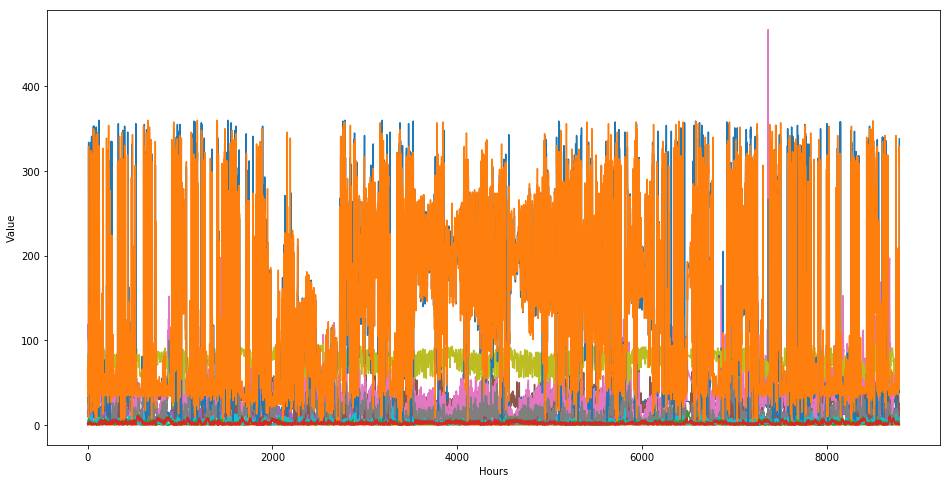

In [8]:
plt.show()

In [9]:
df.loc[start] = df.loc[start].fillna(0)
df.loc[end] = df.loc[end].fillna(0)

In [10]:
plt.figure()
plt.xlabel('Hours')
plt.ylabel('Value')

In [11]:
for column in columns:
    adj_df = df[~df[column].isnull()]
    interp_linear = interp1d(adj_df.index, adj_df[column], kind='linear')
    interp_df = interp_linear(axis_x)
    
    nans = df[df[column].isnull()]
    for index, row in nans.iterrows():
        df[column].loc[index] = interp_df[index]
        
    plt.plot(axis_x, interp_df)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


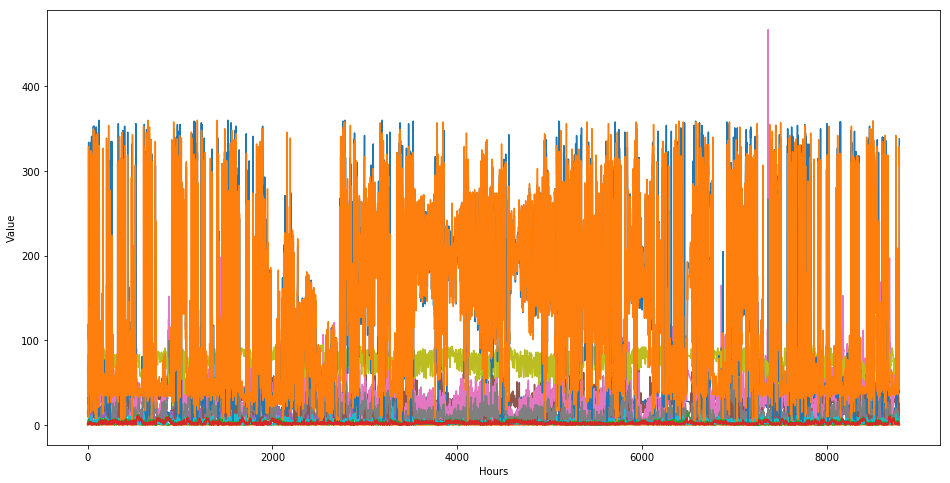

In [12]:
plt.show()

In [13]:
df.to_csv("../data/interpolated.csv", index=False)